<a href="https://colab.research.google.com/github/SIUTRITUE/Machine_Learning/blob/main/Demo_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2 cách để import file

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Bài tập

In [32]:
import pandas as pd
import numpy as np

data = {
    'StudentID': [1, 2, 3, 4, 5],
    'Hours_Studied': [10, 8, 25, 6, np.nan],
    'Attendance(%)': [80, 90, 500, 70, 95],
    'Previous_Grade': [np.nan, 78, 92, 65, 170],
    'Final_Grade': [88, 82, 95, 68, 92]
}
df = pd.DataFrame(data)
df

,StudentID,Hours_Studied,Attendance(%),Previous_Grade,Final_Grade
0,1,10.0,80,NaN,88
1,2,8.0,90,78.0,82
2,3,25.0,500,92.0,95
3,4,6.0,70,65.0,68
4,5,NaN,95,170.0,92


In [33]:
df.describe()

,StudentID,Hours_Studied,Attendance(%),Previous_Grade,Final_Grade
count,5.000000,4.000000,5.000000,4.000000,5.000000
mean,3.000000,12.250000,167.000000,101.250000,85.000000
std,1.581139,8.655441,186.400107,47.140747,10.677078
min,1.000000,6.000000,70.000000,65.000000,68.000000
25%,2.000000,7.500000,80.000000,74.750000,82.000000
50%,3.000000,9.000000,90.000000,85.000000,88.000000
75%,4.000000,13.750000,95.000000,111.500000,92.000000
max,5.000000,25.000000,500.000000,170.000000,95.000000


In [34]:
df['Hours_Studied'].fillna(df['Hours_Studied'].mean(), inplace=True)
df['Previous_Grade'].fillna(df['Previous_Grade'].mean(), inplace=True)
df.head(5)

/tmp/ipython-input-783573426.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hours_Studied'].fillna(df['Hours_Studied'].mean(), inplace=True)
/tmp/ipython-input-783573426.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,StudentID,Hours_Studied,Attendance(%),Previous_Grade,Final_Grade
0,1,10.00,80,101.25,88
1,2,8.00,90,78.00,82
2,3,25.00,500,92.00,95
3,4,6.00,70,65.00,68
4,5,12.25,95,170.00,92


In [35]:
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers
outliers = find_outliers_iqr(df['Attendance(%)'])
print(df[outliers])

   StudentID  Hours_Studied  Attendance(%)  Previous_Grade  Final_Grade
2          3           25.0            500            92.0           95


In [36]:
def handle_outliers_iqr(df, column_name):
    series = df[column_name]
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[df[column_name] < lower_bound, column_name] = lower_bound
    df.loc[df[column_name] > upper_bound, column_name] = upper_bound
    return df
df = handle_outliers_iqr(df, 'Attendance(%)')
df.head()

/tmp/ipython-input-3024021497.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '57.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column_name] < lower_bound, column_name] = lower_bound


,StudentID,Hours_Studied,Attendance(%),Previous_Grade,Final_Grade
0,1,10.00,80.0,101.25,88
1,2,8.00,90.0,78.00,82
2,3,25.00,117.5,92.00,95
3,4,6.00,70.0,65.00,68
4,5,12.25,95.0,170.00,92


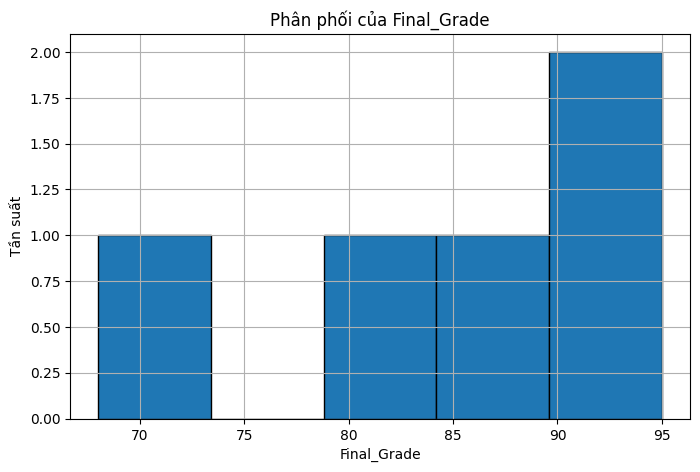

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['Final_Grade'], bins=5, edgecolor='black')
plt.title('Phân phối của Final_Grade')
plt.xlabel('Final_Grade')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

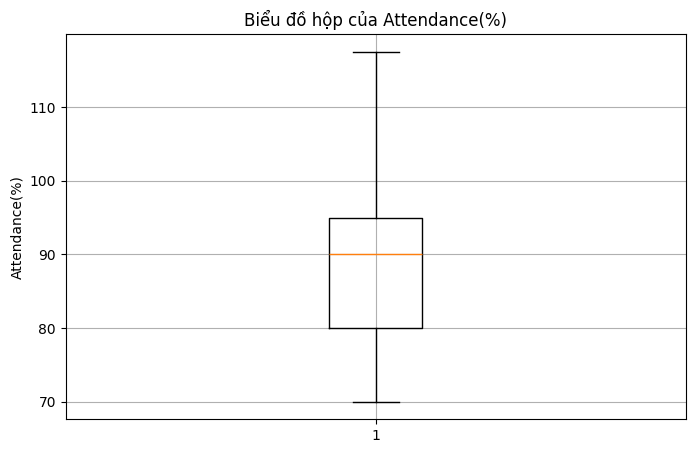

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.boxplot(df['Attendance(%)'])
plt.title('Biểu đồ hộp của Attendance(%)')
plt.ylabel('Attendance(%)')
plt.grid(True)
plt.show()

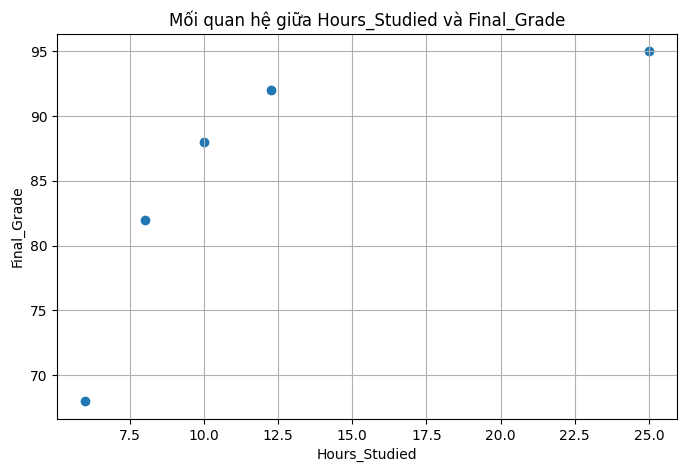

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(x=df['Hours_Studied'], y=df['Final_Grade'])
plt.title('Mối quan hệ giữa Hours_Studied và Final_Grade')
plt.xlabel('Hours_Studied')
plt.ylabel('Final_Grade')
plt.grid(True)
plt.show()

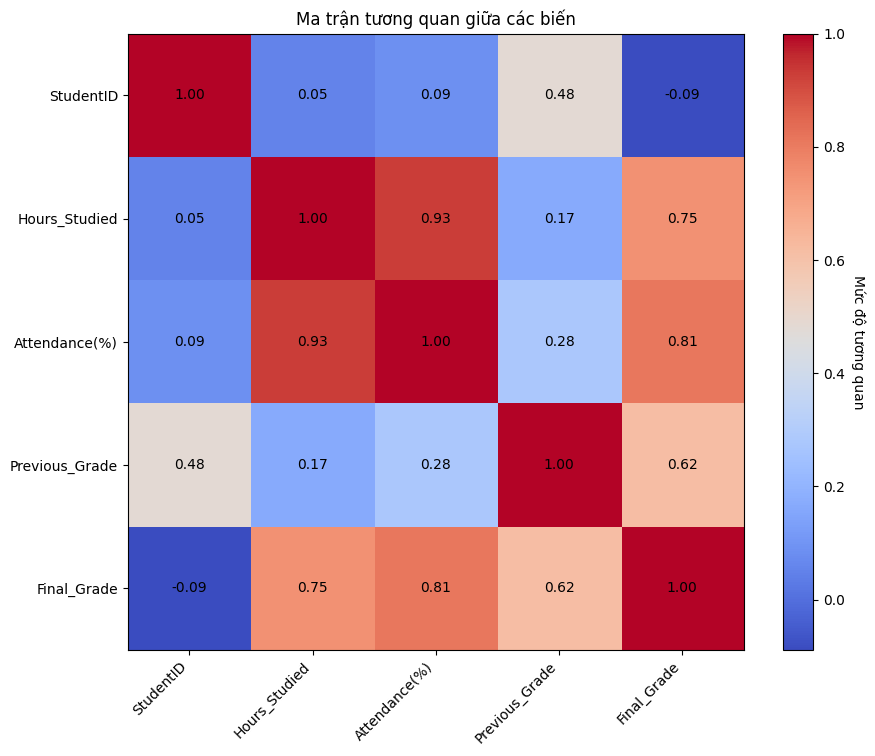

In [41]:
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(correlation_matrix, cmap='coolwarm')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Mức độ tương quan', rotation=-90, va="bottom")

categorical_columns = correlation_matrix.columns

ax.set_xticks(np.arange(len(categorical_columns)))
ax.set_yticks(np.arange(len(categorical_columns)))
ax.set_xticklabels(categorical_columns, rotation=45, ha="right")
ax.set_yticklabels(categorical_columns)

for i in range(len(categorical_columns)):
    for j in range(len(categorical_columns)):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

plt.title('Ma trận tương quan giữa các biến')
plt.show()